HACKATHON 1:

DESCRIPTION:
  
   ADDRESS:https:/raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv
   
   
   
 
  Dataset of indian companies are given for which analysis are done based on age,salary,gender and place.
  

PROCESS:
  1.Understanding the given dataset
   ---> view the given data set and understanding the content 
  2.Data cleaning
   --->removing and correcting given data set
  3.Feature engineering
   --->making it simplier 
  4.Analysis
   ---> discovering useful information
  5.Visualization
   ---> creating charts (providing visual representation to make it even more simplier)
  6.Conclusion
   ---> insights obtained
 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file and naming it to a variable called company
company=pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv",sep=",")
company

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [3]:
#finding the dtype of given columns
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
#changing the dtype for age,gender and salary
company['Gender']=company['Gender'].astype('object')
company['Age'].fillna(0,inplace=True)
company['Age']=company['Age'].astype('int64')
company['Salary'].fillna(0,inplace=True)
company['Salary']=company['Salary'].astype('int64')
#checking the changes made
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  140 non-null    object
 1   Age      148 non-null    int64 
 2   Salary   148 non-null    int64 
 3   Place    134 non-null    object
 4   Country  148 non-null    object
 5   Gender   148 non-null    object
dtypes: int64(2), object(4)
memory usage: 7.1+ KB


In [5]:
#data cleaning :column "age"
company['Age'].value_counts().keys().sort_values()
company.drop(company[company['Age'] == 0].index, inplace = True)
company


,Company,Age,Salary,Place,Country,Gender
0,TCS,20,0,Chennai,India,0
1,Infosys,30,0,Mumbai,India,0
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [6]:
#data cleaning : column "salary"
company['Salary'].value_counts().keys().sort_values()
company.drop(company[company['Salary'] == 0].index, inplace = True)
company

,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
7,Infosys,23,7000,Mumbai,India,1
8,TCS,34,8000,Calcutta,India,1
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [7]:
#data cleaning: removing all null values from the data set
company=company.dropna()
company


,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,0
3,Infosys,40,3000,Delhi,India,0
4,TCS,23,4000,Mumbai,India,0
7,Infosys,23,7000,Mumbai,India,1
8,TCS,34,8000,Calcutta,India,1
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,1
144,Infosys,22,8787,Calcutta,India,1
145,Infosys,44,4034,Delhi,India,1
146,TCS,33,5034,Mumbai,India,1


In [8]:
#data cleaning:  column "gender"
def gen(x):
    if x == 0:
        return 'Female'
    else:
        return 'Male'
company['Gender'] = company['Gender'].apply(gen)
company

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,Female
3,Infosys,40,3000,Delhi,India,Female
4,TCS,23,4000,Mumbai,India,Female
7,Infosys,23,7000,Mumbai,India,Male
8,TCS,34,8000,Calcutta,India,Male
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,Male
144,Infosys,22,8787,Calcutta,India,Male
145,Infosys,44,4034,Delhi,India,Male
146,TCS,33,5034,Mumbai,India,Male


In [24]:
company['Company'].replace({'Infosys Pvt Lmt':'Infosys','Tata Consultancy Services':'TCS','Congnizant':'CTS'},inplace=True)
company

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,Female
3,Infosys,40,3000,Delhi,India,Female
4,TCS,23,4000,Mumbai,India,Female
7,Infosys,23,7000,Mumbai,India,Male
8,TCS,34,8000,Calcutta,India,Male
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,Male
144,Infosys,22,8787,Calcutta,India,Male
145,Infosys,44,4034,Delhi,India,Male
146,TCS,33,5034,Mumbai,India,Male


In [25]:
#final dataset: ("after data cleaning")
company

,Company,Age,Salary,Place,Country,Gender
2,TCS,35,2300,Calcutta,India,Female
3,Infosys,40,3000,Delhi,India,Female
4,TCS,23,4000,Mumbai,India,Female
7,Infosys,23,7000,Mumbai,India,Male
8,TCS,34,8000,Calcutta,India,Male
...,...,...,...,...,...,...
143,TCS,33,9024,Calcutta,India,Male
144,Infosys,22,8787,Calcutta,India,Male
145,Infosys,44,4034,Delhi,India,Male
146,TCS,33,5034,Mumbai,India,Male


In [10]:
#count of gender:
gender=company['Gender'].value_counts()
gender

Female    67
Male      20
Name: Gender, dtype: int64

In [26]:
#count of company:
comp=company['Company'].value_counts()
comp


TCS        33
Infosys    31
CTS        23
Name: Company, dtype: int64

In [27]:
#count of place:
place=company['Place'].value_counts()
place

Mumbai        23
Calcutta      22
Delhi         11
Cochin        10
Noida          6
Hyderabad      5
Chennai        5
Podicherry     2
Bhopal         1
Nagpur         1
Pune           1
Name: Place, dtype: int64

In [53]:
#min and max age range
age=company['Age'].value_counts().keys().sort_values()
age

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 40, 41, 43, 44, 45, 46, 50, 51, 54],
           dtype='int64')

In [28]:
#the average salary provided by each company
company.groupby(['Company'])['Salary'].mean()


Company
CTS        4404.826087
Infosys    5290.548387
TCS        5123.121212
Name: Salary, dtype: float64

In [29]:
#for each company calculating the min and max age
company.groupby('Company')['Age'].agg(['min','max'])


,min,max
Company,,
CTS,17,46
Infosys,21,54
TCS,21,38


In [30]:
#for each company calculating the min and max salary
company.groupby('Company')['Salary'].agg(['min','max'])

,min,max
Company,,
CTS,1089,9876
Infosys,3000,8943
TCS,2300,9024


In [31]:
#for each company finding were least and most number of employees working:
company.groupby('Company')['Place'].agg(['min','max'])

,min,max
Company,,
CTS,Calcutta,Pune
Infosys,Bhopal,Podicherry
TCS,Calcutta,Noida


In [32]:
#for each company finding the min and max age of employee
company.groupby('Company')['Age'].agg(['min','max'])

,min,max
Company,,
CTS,17,46
Infosys,21,54
TCS,21,38


In [33]:
#grouping based on company and place
company.groupby(['Company','Place']).size()


Company  Place     
CTS      Calcutta       4
         Chennai        2
         Cochin         3
         Delhi          2
         Hyderabad      2
         Mumbai         6
         Noida          2
         Podicherry     1
         Pune           1
Infosys  Bhopal         1
         Calcutta       8
         Chennai        2
         Cochin         4
         Delhi          5
         Hyderabad      2
         Mumbai         7
         Noida          1
         Podicherry     1
TCS      Calcutta      10
         Chennai        1
         Cochin         3
         Delhi          4
         Hyderabad      1
         Mumbai        10
         Nagpur         1
         Noida          3
dtype: int64

In [34]:
#grouping based on company and place and total salary paid in that particular place
company.groupby(['Company','Place'])['Salary'].sum()

Company  Place     
CTS      Calcutta      14541
         Chennai        8743
         Cochin         6301
         Delhi         18284
         Hyderabad     11034
         Mumbai        20101
         Noida          4023
         Podicherry     9284
         Pune           9000
Infosys  Bhopal         7000
         Calcutta      48552
         Chennai       11202
         Cochin        27058
         Delhi         17252
         Hyderabad      7218
         Mumbai        37597
         Noida          5098
         Podicherry     3030
TCS      Calcutta      52041
         Chennai        5000
         Cochin        14358
         Delhi         18645
         Hyderabad      3045
         Mumbai        52929
         Nagpur         8000
         Noida         15045
Name: Salary, dtype: int64

CTS is the company that pays higher salary Company
CTS        9876
Infosys    8943
TCS        9024
Name: Salary, dtype: int64


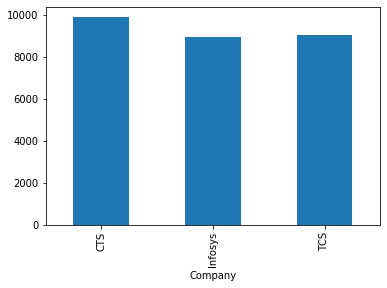

In [49]:
#finding the company that pays heighest salary:
high_sal=company.groupby(['Company'])['Salary'].max()
print("CTS is the company that pays higher salary",high_sal)
high_sal.plot(kind='bar')


CTS is the company that pays lowest salary Company
CTS        1089
Infosys    3000
TCS        2300
Name: Salary, dtype: int64


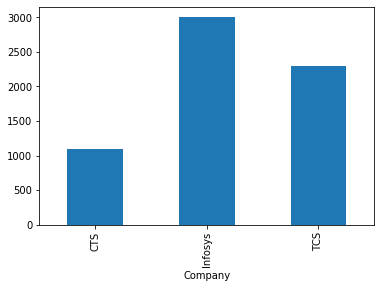

In [51]:
#find the company that pays lowest salary:
low_sal=company.groupby(['Company'])['Salary'].min()
print("CTS is the company that pays lowest salary",low_sal)
low_sal.plot(kind='bar')



In [57]:
#finding the minimum and maximum age of employee in the given indian company:
age=company['Age'].value_counts().keys().sort_values()
print("The minimum age of an employee in an Indian company:",age.min())
print("The maximum age of an employee in an Indian company:",age.max())

The minimum age of an employee in an Indian company: 17
The maximum age of an employee in an Indian company: 54


Female employees are more in the given dataset.
 Female    67
Male      20
Name: Gender, dtype: int64


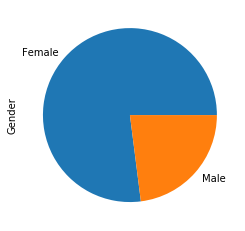

In [65]:
#finding how many employees are male and how many are female
gender=company['Gender'].value_counts()
print("Female employees are more in the given dataset.\n", gender)
gender.plot(kind='pie')

TCS has more employees
CTS has less employees


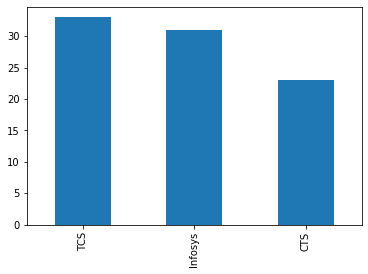

In [69]:
#finding employee count based on each company
comp=company['Company'].value_counts()
print("TCS has more employees")
print("CTS has less employees")
comp.plot(kind="bar")

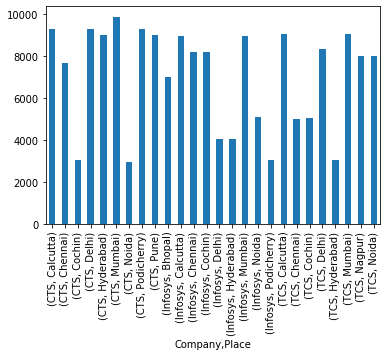

In [76]:
region=company.groupby(['Company','Place'])['Salary'].max()
region.plot(kind='bar')

Company  Place     
CTS      Calcutta       4
         Chennai        2
         Cochin         3
         Delhi          2
         Hyderabad      2
         Mumbai         6
         Noida          2
         Podicherry     1
         Pune           1
Infosys  Bhopal         1
         Calcutta       8
         Chennai        2
         Cochin         4
         Delhi          5
         Hyderabad      2
         Mumbai         7
         Noida          1
         Podicherry     1
TCS      Calcutta      10
         Chennai        1
         Cochin         3
         Delhi          4
         Hyderabad      1
         Mumbai        10
         Nagpur         1
         Noida          3
dtype: int64

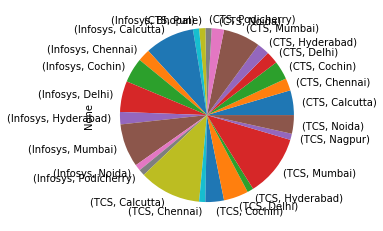

In [85]:
#employee count in each company based on the place
count_region=company.groupby(['Company','Place']).size()
count_region.plot(kind='pie')
count_region


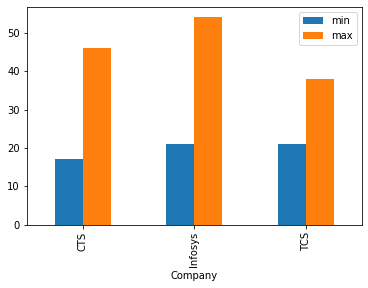

In [86]:
#min and max age of the employee based on each company:
age_minmax=company.groupby('Company')['Age'].agg(['min','max'])
age_minmax
age_minmax.plot(kind='bar')

In [ ]:
                    ######### THANK YOU ########